# Assignment No 01 for CS 871 (Machine Learning)

Submitted by: Muhammad Salman Akhtar Registration No: 398895

## Question No 2

# Gradient Descent Algorithm

In [106]:
# Import the requisite modules
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

def GetScale(X):
    scale = StandardScaler()
    scaledX = scale.fit_transform(X)
    scaledX[:,0] = 1.0
    return scale, scaledX 

def CalculateHypothesis(X,theta):
    YPredicted = np.dot(X,theta)
    return YPredicted
def CalculateCostFunction(X,Y,YPredicted):
    cost = 1/(len(X))*np.sum(np.square(YPredicted - Y))
    cost = cost/2
    return cost
def CalculateDerivativesofCostFunction(X,Y,YPredicted):
    deltaTheta = np.zeros(theta.shape)
    for i in range(len(deltaTheta)):
        diffPredict = YPredicted-Y
        prodX = np.multiply(diffPredict,X[:,i].reshape(len(X),1))
        deltaTheta[i] = 1/(len(X))*np.sum(prodX)
    return deltaTheta
def UpdateParameters(theta, deltaTheta, alpha):
    tempTheta = theta - alpha*deltaTheta
    theta = tempTheta
    return theta
def CalculateGradientDescent(X,Y,theta,alpha,iterations):
    cost = []
    for i in range(iterations):
        YPredicted = CalculateHypothesis(X,theta)
        cost.append(CalculateCostFunction(X,Y,YPredicted))
        deltaTheta = CalculateDerivativesofCostFunction(X,Y,YPredicted)
        theta = UpdateParameters(theta, deltaTheta, alpha)
        if i%200==0:
            print("Cost after " + str(i) + " iterations is: " + str(cost[i]))
    return cost,theta

In [107]:
# Data set formulation
X = np.array([[1,0.211,21.336],[1,0.218,19.812],[1,0.224,19.20],[1,0.267,21.946],[1,0.272,24.689],[1,0.274,25.298],
              [1,0.279,20.117],[1,0.279,22.860],[1,0.282,24.384],[1,0.284,22.860],[1,0.287,24.079],[1,0.290,23.165],
              [1,0.290,23.165],[1,0.297,21.031],[1,0.305,22.860],[1,0.328,22.555],[1,0.328,25.908],[1,0.338,26.213],
              [1,0.348,21.641],[1,0.351,19.507],[1,0.356,23.774],[1,0.361,24.384],[1,0.368,22.555],[1,0.406,21.946],
              [1,0.414,23.470],[1,0.439,24.689],[1,0.444,24.994],[1,0.455,24.384],[1,0.457,24.384],[1,0.457,24.384],
              [1,0.523,26.518]])
Y = np.array([[0.292],[0.292],[0.289],[0.464],[0.532],[0.558],[0.442],[0.515],[0.640],[0.564],[0.685],
             [0.595],[0.606],[0.603],[0.541],[0.629],[0.957],[0.776],[0.728],[0.705],[0.977],[0.898],
             [1.028],[1.085],[1.206],[1.569],[1.577],[1.651],[1.458],[1.444],[2.180]])

Cost after 0 iterations is: 0.4697844838709677
Cost after 200 iterations is: 0.014382916420711551
Cost after 400 iterations is: 0.005918325214688496
Cost after 600 iterations is: 0.005533516847460229
Cost after 800 iterations is: 0.0054922713770507005
Cost after 1000 iterations is: 0.005486537576035011
theta0: [0.85435021]
theta1: [0.4100708]
theta2: [0.06149285]


<function matplotlib.pyplot.show(close=None, block=None)>

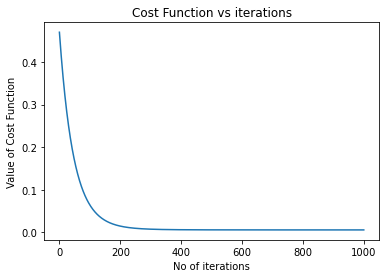

In [108]:
# Parameter estimation through Gradient Descent
theta = np.zeros((X.shape[1],1))
alpha = 0.01
iterations = 1000
scale , X = GetScale(X)
# print(X)
cost,theta = CalculateGradientDescent(X,Y,theta,alpha,iterations)
print("Cost after " + str(iterations) + " iterations is: " + str(cost[iterations-1]))
for i in range(len(theta)):
    print("theta" + str(i) + ": " + str(theta[i]))

plt.plot(cost)
plt.title("Cost Function vs iterations")
plt.xlabel("No of iterations")
plt.ylabel("Value of Cost Function")
plt.show

In [109]:
XTest = np.array([[1,0.65,28.5],[1,0.68,29.1]])
scaledX = scale.transform(XTest)
scaledX[:,0] = 1.0
YPredicted = CalculateHypothesis(scaledX,theta)
print("Predicted Prices are: ")
for i in range(len(YPredicted)):
    print("Predicted value against observation "  + str (XTest[i,1:]) + " is " + str(YPredicted[i]))

Predicted Prices are: 
Predicted value against observation [ 0.65 28.5 ] is [2.66704511]
Predicted value against observation [ 0.68 29.1 ] is [2.84339563]
